In [43]:
from util import get_clean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
clean = get_clean()
accessions = clean['query acc.'].unique()
clean

,query acc.,query length,subject accs.,subject length,evalue,q. start,q. end
0,2.A.1.1.1-P0AEP1,464,CDD:273317,481,1.930000e-152,9,447
1,2.A.1.1.1-P0AEP1,464,CDD:395036,452,1.010000e-142,18,451
2,2.A.1.1.1-P0AEP1,464,CDD:340873,365,7.420000e-133,21,438
3,2.A.1.1.1-P0AEP1,464,CDD:340917,383,2.820000e-118,17,438
4,2.A.1.1.1-P0AEP1,464,CDD:340918,362,1.660000e-102,22,438
...,...,...,...,...,...,...,...
80,2.A.1.1.1-P0AEP1,464,CDD:341031,365,3.140000e-04,34,379
81,2.A.1.1.1-P0AEP1,464,CDD:340928,371,3.730000e-04,41,159
82,2.A.1.1.1-P0AEP1,464,CDD:340895,388,3.750000e-04,65,435
83,2.A.1.1.1-P0AEP1,464,CDD:341029,362,5.330000e-04,20,173


In [45]:
clean['size'] = clean['q. end'] - clean['q. start'] + 1
clean

,query acc.,query length,subject accs.,subject length,evalue,q. start,q. end,size
0,2.A.1.1.1-P0AEP1,464,CDD:273317,481,1.930000e-152,9,447,439
1,2.A.1.1.1-P0AEP1,464,CDD:395036,452,1.010000e-142,18,451,434
2,2.A.1.1.1-P0AEP1,464,CDD:340873,365,7.420000e-133,21,438,418
3,2.A.1.1.1-P0AEP1,464,CDD:340917,383,2.820000e-118,17,438,422
4,2.A.1.1.1-P0AEP1,464,CDD:340918,362,1.660000e-102,22,438,417
...,...,...,...,...,...,...,...,...
80,2.A.1.1.1-P0AEP1,464,CDD:341031,365,3.140000e-04,34,379,346
81,2.A.1.1.1-P0AEP1,464,CDD:340928,371,3.730000e-04,41,159,119
82,2.A.1.1.1-P0AEP1,464,CDD:340895,388,3.750000e-04,65,435,371
83,2.A.1.1.1-P0AEP1,464,CDD:341029,362,5.330000e-04,20,173,154


In [46]:
intervals = np.array(clean[['q. start', 'q. end']].sort_values('q. start'))

In [47]:
def plot_interval(id, interval):
    space = np.linspace(interval[0], interval[1], 2)
    plt.plot(space, [id] * len(space))

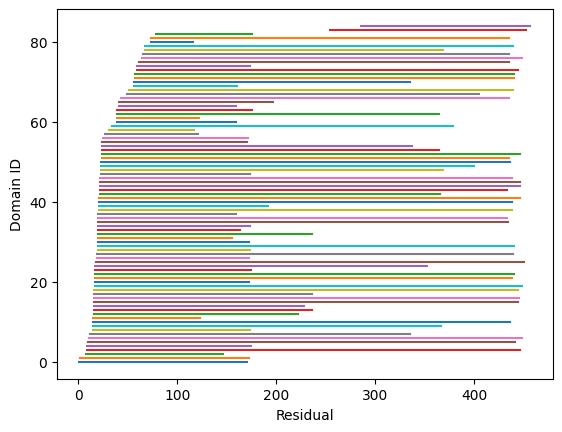

In [48]:
for i in range(len(intervals)):
    plot_interval(i, intervals[i])
    plt.xlabel("Residual")
    plt.ylabel("Domain ID")

In [92]:
def find_links(p_length, intervals):
    unknown = [1] * p_length
    
    for start, end in intervals:
        for i in range(start + 1, end + 2):
            unknown[i] = 0
    res = []
    start = None

    for i in range(p_length):
        if unknown[i] == 1:
            if start is None:
                start = i + 1  # Convert to 1-based index
        else:
            if start is not None:
                res.append([start, i])  # Use i+1 to account for 1-based index
                start = None

    if start is not None:
        res.append([start, p_length])
    
    return res

find_links(464, intervals)

[[1, 2], [460, 464]]

In [91]:
def print_plot(p_length, links, scaled=True):
    SCALE = 200
    scale = SCALE
    if not scaled:
        scale = p_length
    structure = []
    curr = 1
    while len(links) != 0:
        if links[0][0] == curr:
            structure.append([*links.pop(0), 0])
            curr = structure[-1][1] + 1
        else:
            structure.append([curr, links[0][0] - 1, 1])
            curr = links[0][0]
    percent = 0
    res = ''
    for curr in structure:
        percent += (curr[1] - curr[0] + 1) * scale / p_length
        while len(res) < round(percent, 0):
            if curr[-1] == 0:
                res += '\u2015'
            else:
                res += '\u2588'
    return res
print_plot(464, find_links(464, intervals), False)

'――█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████―――――'

In [184]:
import pandas as pd
import numpy as np

df = pd.read_csv('headers.csv')

df['TCID'] = df['TCID'].apply(lambda x: x[1:])
df['fam'] = df['TCID'].apply(lambda x: '.'.join(x.split('.')[:3]))
small_fam = df.copy().groupby('fam').count().reset_index()
small_fam = small_fam[small_fam['TCID'] <= 20]['fam']

In [185]:

df = df[df['fam'].isin(small_fam)]
df['count'] = np.ones(df.shape[0])

df = df.groupby('TCID').sum().sort_values('count').reset_index()
df['class'] = df['TCID'].apply(lambda x: '.'.join(x.split('.')[:3]))
invalids = df[df['count'] > 1]['class']
df = df[~df['class'].isin(invalids)]['TCID']
df


0       1.A.100.1.1
1        8.B.17.1.3
2        8.B.17.1.2
3        8.B.17.1.1
4        8.B.16.4.3
           ...     
8205      1.C.8.1.2
8206      1.C.8.1.3
8207      1.G.8.1.1
8208      1.G.8.1.2
8209    1.C.81.1.10
Name: TCID, Length: 7650, dtype: object

In [186]:

df.to_csv('valid_tcid.txt', sep=',', index=False, header=False)

In [13]:
import shutil
import os

with open("importants.txt", "r") as file:
    lines = file.readlines() 
    for line in lines:
        shutil.copy("aligns\\" + line.strip() +"align.aln", "important")